In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from  sklearn.linear_model import LogisticRegression#algo used to predict good or bad
from sklearn.model_selection import train_test_split #spliting the data between feature and target
from sklearn.metrics import classification_report #gives whole report about metrices
from sklearn.metrics import confusion_matrix #gives info about actual and predict
from nltk.tokenize import RegexpTokenizer #regexp tokenizer use to split words from text
from nltk.stem.snowball import SnowballStemmer #stemes words
from sklearn.feature_extraction.text import CountVectorizer #create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline #use for combining all preprocessors techniques and algos

from PIL import Image #getting images in notebook
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator #creates words cloud
#from bs4 import BeautifulSoup #use for scraping the data from website
#from selenium import webdriver #use for automation chrome
import networkx as nx
import pickle #use to dump model
import warnings #ignore pink warnings
warnings.filterwarnings('ignore')



In [ ]:
#mounting drive
from google.colab import drive
drive.mount("/content/sdrive")

Mounted at /content/sdrive


In [ ]:
#reading data
phishing_data1=pd.read_csv("/content/sdrive/MyDrive/phishing_site_urls.csv",usecols=['URL','Label'],encoding='latin1',error_bad_lines=False)
phishing_data1.columns=['URL','Label']
phish_data=pd.read_csv('/content/sdrive/MyDrive/phishing_site_urls.csv')


In [ ]:
#displaying starting data
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
#displaying ending data
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
#infomation about data
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
phish_data.isnull().sum()#there is no missing values

URL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts=pd.DataFrame(phish_data.Label.value_counts())

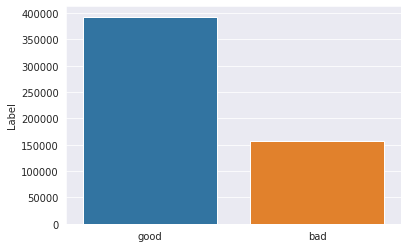

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)


In [ ]:
#preprocesing
tokenizer=RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
#this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0])#using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized....')
phish_data['text_tokenized']=phish_data.URL.map(lambda t:tokenizer.tokenize(t))#doing with all rows

Getting words tokenized....


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
171570,en.wikipedia.org/wiki/Beautiful_Creatures_(band),good,"[en, wikipedia, org, wiki, Beautiful, Creature..."
509404,95.47.161.41/module/311ac29c5a8f6b4e7a247db982...,bad,"[module, ac, c, a, f, b, e, a, db, fd, e]"
259287,wiki.the-big-bang-theory.com/,good,"[wiki, the, big, bang, theory, com]"
48948,www.freewebs.com/lesofa/,good,"[www, freewebs, com, lesofa]"
182499,en.wikipedia.org/wiki/Zefram_Cochrane,good,"[en, wikipedia, org, wiki, Zefram, Cochrane]"


In [ ]:
stemmer=SnowballStemmer('english')#choose a language
phish_data['text_stemmed']=phish_data['text_tokenized'].map(lambda l : [stemmer.stem(word) for word in l])

In [ ]:
print('getting joiningwords....')
phish_data['text_sent']=phish_data['text_stemmed'].map(lambda l: ' '.join(l))

getting joiningwords....


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
333266,facebook.com/tranmereroversfc,good,"[facebook, com, tranmereroversfc]","[facebook, com, tranmereroversfc]",facebook com tranmereroversfc
121230,negociandoseuimovel.com.br/wp-content/themes/g...,bad,"[negociandoseuimovel, com, br, wp, content, th...","[negociandoseuimovel, com, br, wp, content, th...",negociandoseuimovel com br wp content theme go...
154750,ca.linkedin.com/pub/dir/Dwain/+,good,"[ca, linkedin, com, pub, dir, Dwain]","[ca, linkedin, com, pub, dir, dwain]",ca linkedin com pub dir dwain
151343,blogs.news.sky.com/kleinman/Post:c33cf051-a159...,good,"[blogs, news, sky, com, kleinman, Post, c, cf,...","[blog, news, sky, com, kleinman, post, c, cf, ...",blog news sky com kleinman post c cf a d b b c...
156702,castrovalley.patch.com/topics/Assemblywoman+Ma...,good,"[castrovalley, patch, com, topics, Assemblywom...","[castrovalley, patch, com, topic, assemblywoma...",castrovalley patch com topic assemblywoman mar...


In [ ]:
#visualization
#1.Visualize some important keys using word cloud
#sliceing classes
bad_sites=phish_data[phish_data.Label=='bad']
good_sites=phish_data[phish_data.Label=='good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [ ]:
cv=CountVectorizer()

In [ ]:
feature=cv.fit_transform(phish_data.text_sent)

In [ ]:
#spliting the data
trainX,testX,trainY,testY=train_test_split(feature,phish_data.Label)

In [ ]:
#logistic regression
#create LR Object
lr=LogisticRegression()

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)

0.9639135848314729

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9771606930916558
Testing Accuracy : 0.9639135848314729

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36399
        Good       0.99      0.96      0.98    100938

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337



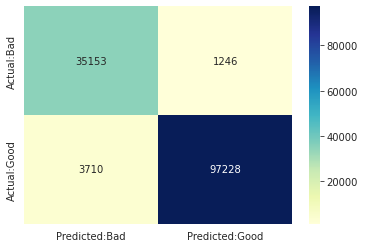

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive'
import os

In [ ]:
file_name='phishing.pkl'
path_to_embed=os.path.join(path,file_name)
import pickle

predict_bad = ['google.com','twitter.com','aws.kk','apple.com','www.example.com/','youtube.com/','yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['www.henkdeinumboomkwekerij.nl/language/pdf_fonts/smiles.php','youtube.com/','apple.in','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html','varma59.dev']
loaded_model = pickle.load(open(path_to_embed, 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad']
******************************
['bad' 'good' 'good' 'good' 'good' 'good' 'good']
